In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [84]:
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
data = pd.read_csv(os.path.join(parent_directory, "data", "Kidney.csv"))
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [121]:
selected_columns = data.iloc[:, 20:25]
selected_columns

,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,1,1
3,0,1,1,1,1
4,0,0,0,0,1
...,...,...,...,...,...
395,0,0,0,0,0
396,0,0,0,0,0
397,0,0,0,0,0
398,0,0,0,0,0


In [86]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [87]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [88]:
data.classification=data.classification.replace("ckd\t","ckd")

In [89]:
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [90]:
data=data.drop("id",axis=1)

In [91]:
data.shape

(400, 25)

In [92]:
data['classification']=data['classification'].replace(['ckd',"notckd"],[1,0])

C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\585931488.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['classification']=data['classification'].replace(['ckd',"notckd"],[1,0])


In [93]:
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [94]:

data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [95]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [97]:
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

In [98]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

Extracting categorical and numerical columns

In [99]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]
num_col=[col for col in data.columns if data[col].dtype!="object"]

In [100]:
for col in cat_col:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [101]:
data.diabetes_mellitus=data["diabetes_mellitus"]. replace( ["\tno",'\tyes'],["no","yes"])
data.coronary_artery_disease= data['coronary_artery_disease'].replace('\tno','no')

In [102]:
cols = ['diabetes_mellitus', 'coronary_artery_disease']
for col in cols:
    print(f"{col} has {data[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' ' yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values



C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWar

C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette = 'rocket')
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\2623793952.py:7: FutureWar

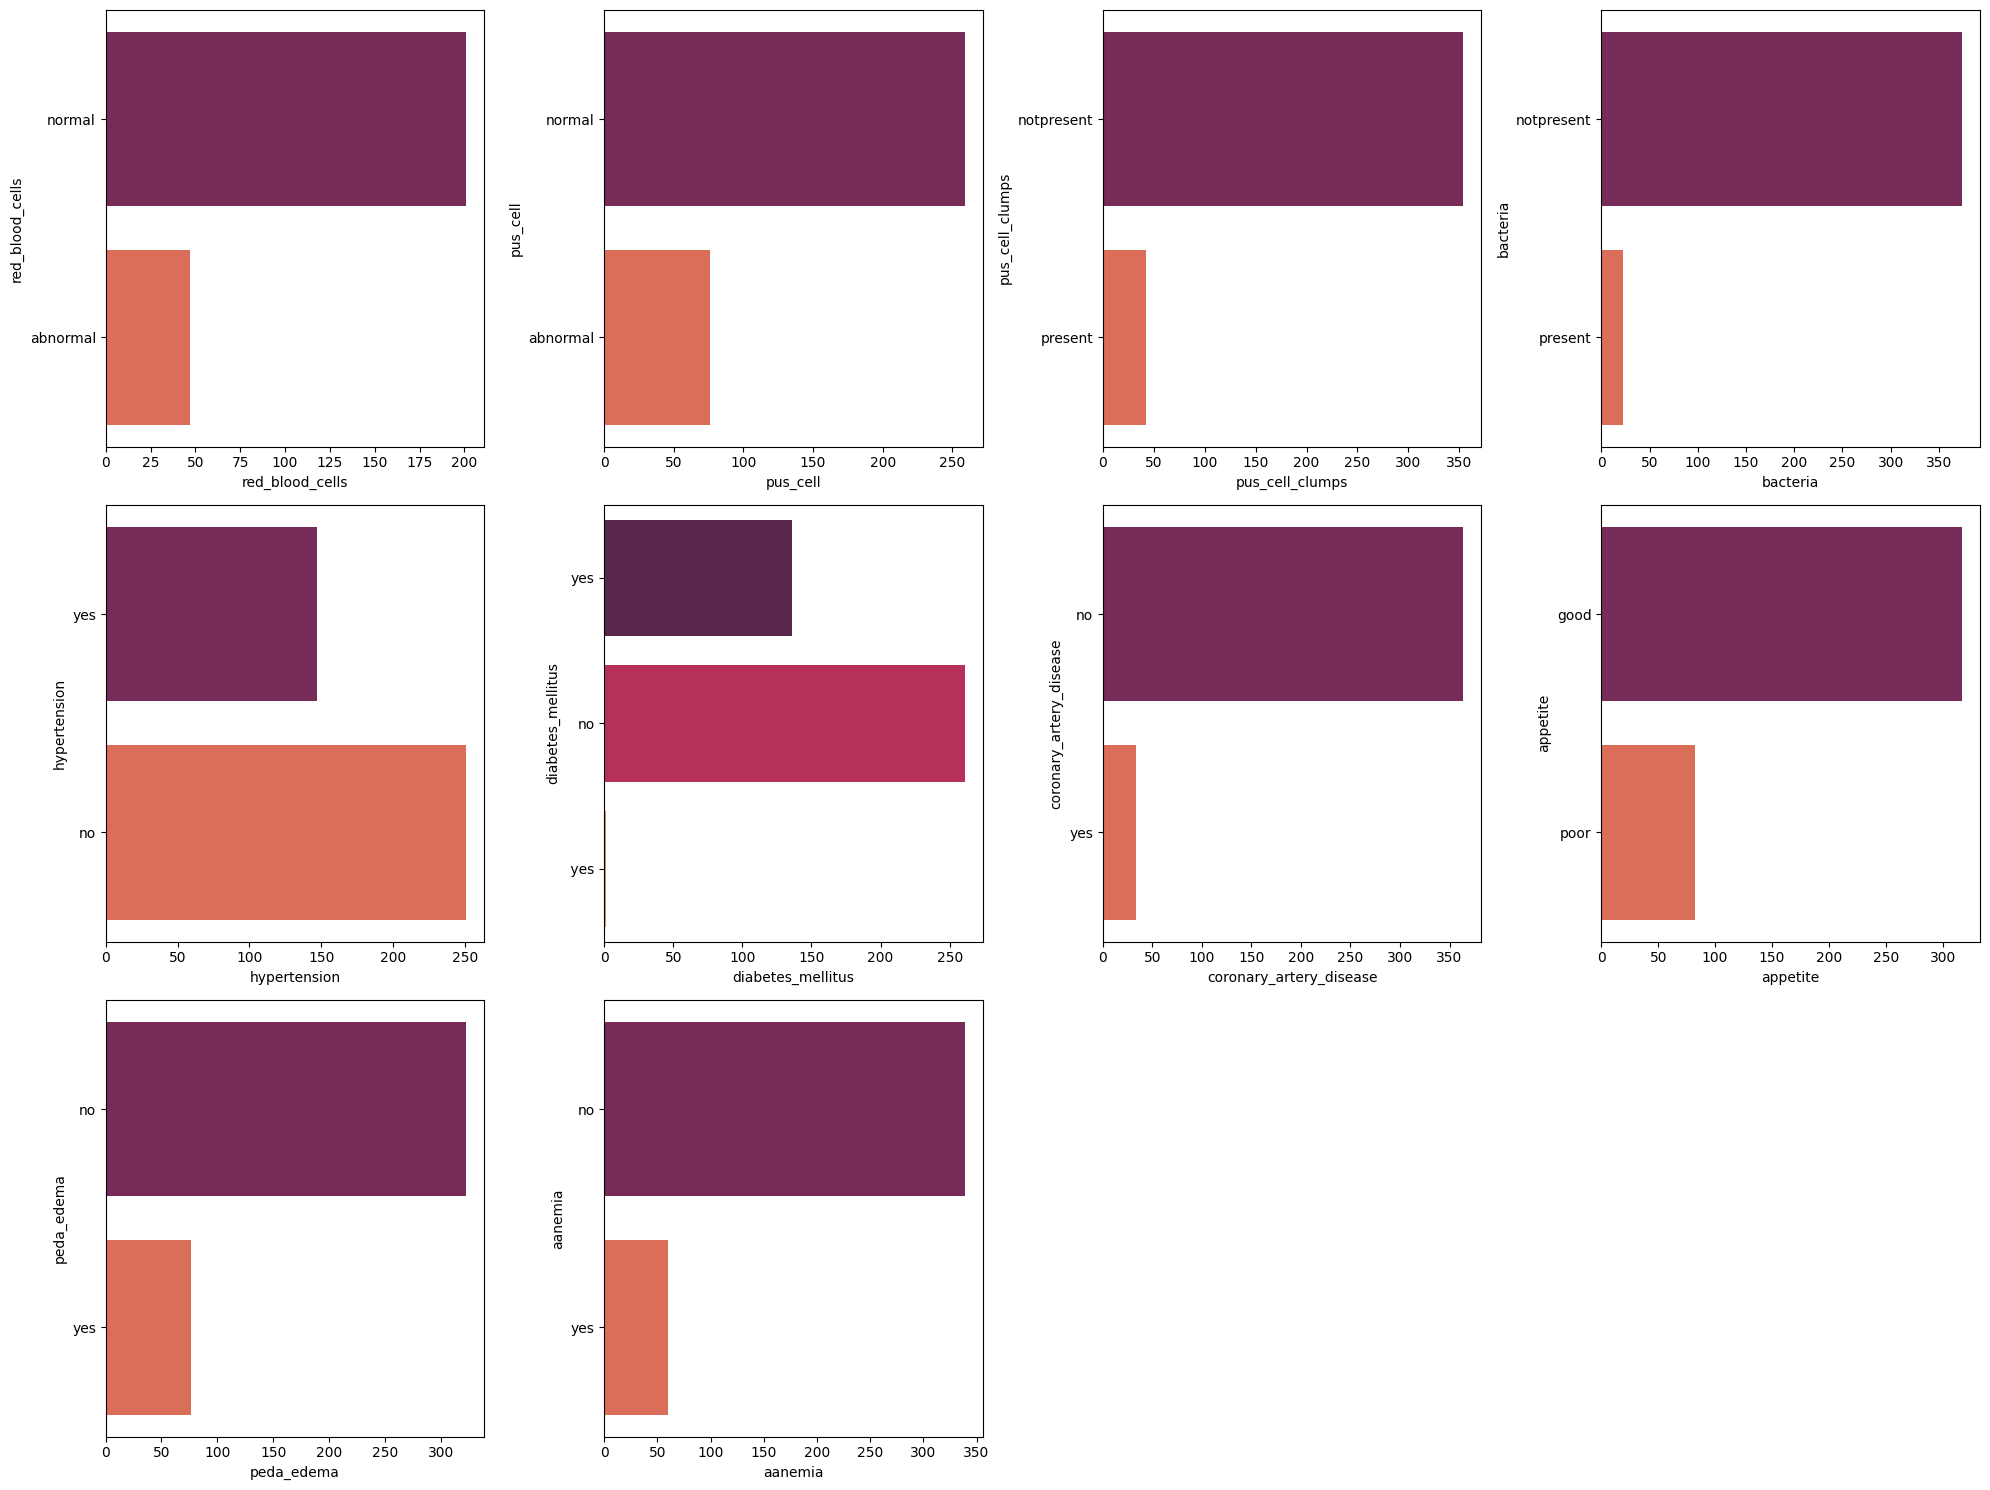

In [103]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_col:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [104]:
for col in num_col:
    data[col]=data[col].fillna(data[col].median())

In [105]:
for col in cat_col:
    print(f" {col} most frequent value is {data[col].mode()}\n")

 red_blood_cells most frequent value is 0    normal
Name: red_blood_cells, dtype: object

 pus_cell most frequent value is 0    normal
Name: pus_cell, dtype: object

 pus_cell_clumps most frequent value is 0    notpresent
Name: pus_cell_clumps, dtype: object

 bacteria most frequent value is 0    notpresent
Name: bacteria, dtype: object

 hypertension most frequent value is 0    no
Name: hypertension, dtype: object

 diabetes_mellitus most frequent value is 0    no
Name: diabetes_mellitus, dtype: object

 coronary_artery_disease most frequent value is 0    no
Name: coronary_artery_disease, dtype: object

 appetite most frequent value is 0    good
Name: appetite, dtype: object

 peda_edema most frequent value is 0    no
Name: peda_edema, dtype: object

 aanemia most frequent value is 0    no
Name: aanemia, dtype: object



In [106]:
data['red_blood_cells'].fillna('normal', inplace=True)
data['aanemia'].fillna('no', inplace=True)
data['peda_edema'].fillna('no', inplace=True)
data["coronary_artery_disease"].fillna('no', inplace=True)
data['diabetes_mellitus'].fillna('no', inplace=True)
data['pus_cell_clumps'].fillna('notpresent', inplace=True)
data["coronary_artery_disease"].fillna('no', inplace=True)
data["hypertension"].fillna("no", inplace=True)
data["appetite"].fillna("good", inplace=True)
data["pus_cell"].fillna("normal", inplace=True)
data["bacteria"].fillna("notpresent", inplace=True)


C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\1853163570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['red_blood_cells'].fillna('normal', inplace=True)
C:\Users\Divyansh Dev\AppData\Local\Temp\ipykernel_8424\1853163570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [107]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [108]:
for col in cat_col:
    print(f"{col} has {data[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 3 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [110]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,1


In [111]:
x=data.drop("class",axis=1)
y=data["class"]

In [112]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with a higher max_iter value
models = [
        ("Logistic Regression", LogisticRegression(max_iter=1000)),
        ("K-Nearest Neighbors", KNeighborsClassifier()),
        ("Support Vector Classifier", SVC()),
        ("Gaussian Naive Bayes", GaussianNB()),
    ]

In [113]:
from sklearn.model_selection import train_test_split
x = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

results = []
for model_name, model in models:
        model.fit(x_train, y_train)
        train_accuracy = model.score(x_train, y_train)
        test_accuracy = model.score(x_test, y_test)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append((model_name, accuracy, train_accuracy, test_accuracy, recall, f1))

c:\Users\Divyansh Dev\OneDrive\Desktop\medicare\ml flask backend\myproject\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
columns = ['model_name', 'accuracy', 'train_accuracy', 'test_accuracy', 'recall', 'f1']
resultFrame = pd.DataFrame(results, columns=columns)
resultFrame

,model_name,accuracy,train_accuracy,test_accuracy,recall,f1
0,Logistic Regression,0.9875,0.978125,0.9875,0.9875,0.987446
1,K-Nearest Neighbors,0.6875,0.821875,0.6875,0.6875,0.693355
2,Support Vector Classifier,0.6500,0.618750,0.6500,0.6500,0.512121
3,Gaussian Naive Bayes,0.9875,0.959375,0.9875,0.9875,0.987549


In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, model.predict(x_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, model.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, model.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, model.predict(x_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[28  0]
 [ 0 52]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [116]:
import joblib
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
filepath = os.path.join(parent_directory, "pklfiles", "Kidney.pkl")

joblib.dump(model ,filepath)

['c:\\Users\\Divyansh Dev\\OneDrive\\Desktop\\medicare\\ml flask backend\\pklfiles\\Kidney.pkl']

In [117]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,0


In [118]:
x_test

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
209,19.0,70.0,1.020,0.0,0.0,1,1,0,0,121.0,...,11.5,40.0,6900.0,4.8,0,1,0,0,0,0
280,47.0,80.0,1.020,0.0,0.0,1,1,0,0,93.0,...,13.3,52.0,8100.0,5.2,0,1,0,0,0,0
33,60.0,100.0,1.020,2.0,0.0,0,0,0,0,140.0,...,10.1,29.0,8000.0,4.8,1,1,0,1,0,0
210,59.0,100.0,1.015,4.0,2.0,1,1,0,0,255.0,...,7.3,20.0,9800.0,3.9,1,2,1,0,0,1
93,73.0,100.0,1.010,3.0,2.0,0,0,1,0,295.0,...,9.2,30.0,7000.0,3.2,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48.0,110.0,1.015,3.0,0.0,0,1,1,0,106.0,...,8.6,26.0,5000.0,2.5,1,1,1,0,0,1
227,57.0,80.0,1.015,0.0,0.0,1,1,0,0,120.0,...,11.3,36.0,7200.0,3.8,1,2,0,0,0,0
369,75.0,70.0,1.020,0.0,0.0,1,1,0,0,107.0,...,13.6,46.0,10300.0,4.8,0,1,0,0,0,0
176,21.0,90.0,1.010,4.0,0.0,1,0,1,1,107.0,...,8.3,23.0,12400.0,3.9,0,1,0,0,0,1
